Intrinsic dimension = number of PCA features with significant
variance

In [1]:
%autosave 0

In [21]:
# Perform the necessary imports
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import log_loss
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline

In [3]:
df=pd.read_csv('baseProjeto_entradaModelo.csv', index_col=0)
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [4]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [5]:
y=df['Perda30']

In [6]:
y=y.values

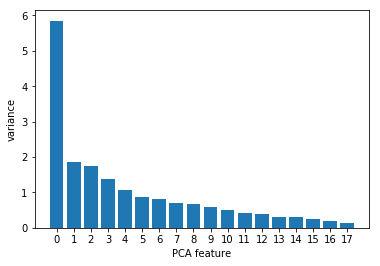

In [7]:
# Create scaler: scaler
scaler = StandardScaler()

# Create a PCA instance: pca
pca = PCA()

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the pipeline to 'samples'
pipeline.fit(X)

# Plot the explained variances
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_)
plt.xlabel('PCA feature')
plt.ylabel('variance')
plt.xticks(features)
plt.show()

In [14]:
# Create a PCA model with 2 components: pca
pca = PCA(n_components=3)

# Create pipeline: pipeline
pipeline = make_pipeline(scaler, pca)

# Fit the PCA instance to the scaled samples
pipeline.fit(X)

# Transform the scaled samples: pca_features
pca_features = pca.transform(X)

# Print the shape of pca_features
print(pca_features.shape)

(293, 3)


In [15]:
pca_features

array([[-2.14907683e+02,  2.13922365e+02, -3.11786769e+02],
       [-2.15015851e+02,  2.13961380e+02, -3.12045623e+02],
       [-2.15031102e+02,  2.13940138e+02, -3.12043947e+02],
       [-2.14810352e+02,  2.13899853e+02, -3.11572791e+02],
       [-6.18483148e+01,  6.35690693e+01, -9.42750297e+01],
       [-5.21657901e-01,  2.78822511e+00, -6.06285512e+00],
       [-2.44593021e+01,  2.63881156e+01, -4.04950307e+01],
       [-2.14676286e+02,  2.14589217e+02, -3.11873619e+02],
       [-2.38666667e+01,  2.58508545e+01, -3.77109878e+01],
       [-2.14650142e+02,  2.14625632e+02, -3.11876493e+02],
       [-2.16243736e+02,  2.14357956e+02, -3.11103330e+02],
       [-5.12470918e+01,  5.09314104e+01, -7.41306584e+01],
       [-7.45538108e+01,  7.40373402e+01, -1.07489030e+02],
       [-2.16163020e+02,  2.14262116e+02, -3.10815200e+02],
       [-6.30349315e+01,  6.29531323e+01, -9.39622003e+01],
       [ 2.23619344e+00, -1.45811323e+00,  4.89097573e-03],
       [ 2.31320470e+00, -1.52340256e+00

[]

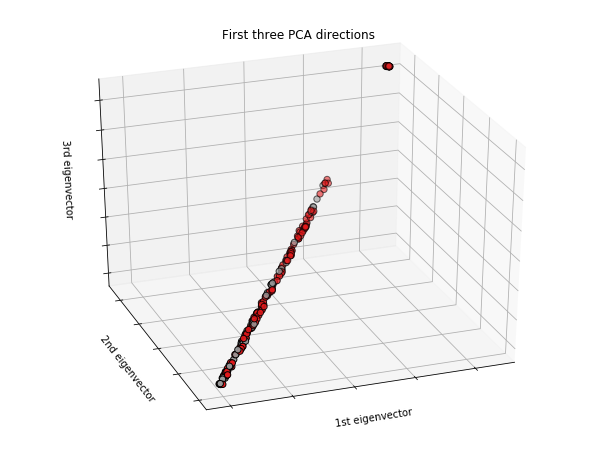

In [16]:
xs=pca_features[:,0]
ys=pca_features[:,1]
zs=pca_features[:,2]

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)
ax.scatter(pca_features[:, 0], pca_features[:, 1], pca_features[:, 2], c=y,
           cmap=plt.cm.Set1, edgecolor='k', s=40)
ax.set_title("First three PCA directions")
ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

In [25]:
df.columns

Index(['AREA', 'POÇO', 'ID_INTERVALO', 'ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14',
       'Perda30', 'PerdaAPI', 'PerdaPS', 'PERDA_MAX'],
      dtype='object')

In [26]:
X=df[['ATRIB_MED1', 'ATRIB_MAX1',
       'ATRIB_DIST1', 'DIFP', 'MGP1', 'MGP2', 'MGP3', 'MGP4', 'MGP5', 'MGP6',
       'MGP7', 'MGP8', 'MGP9', 'MGP10', 'MGP11', 'MGP12', 'MGP13', 'MGP14']]

In [27]:
y = df['Perda30']

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=21)

<br>
## Neural Network

In [60]:
steps = [('scaler', StandardScaler()),('pca',PCA(n_components=10)) ,(('neural', MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(50, 32), random_state=1)))]
pipeline = Pipeline(steps)

hidden_layer_sizes=(n1, n2,..., nx) <br>
n1 = number of neurons in hidden layer_1 <br>
nx = number of neurons in hidden layer_x <br>

In [61]:
neural_scaled = pipeline.fit(X_train, y_train)

C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [62]:
y_pred = pipeline.predict(X_test) 

In [63]:
accuracy_score(y_test, y_pred)

0.7457627118644068

In [64]:
y_pred_prob = pipeline.predict_proba(X_test)[:,1]

In [65]:
#for i in range(len(y_pred)):
#    print(y_pred_prob[i],y_pred[i])

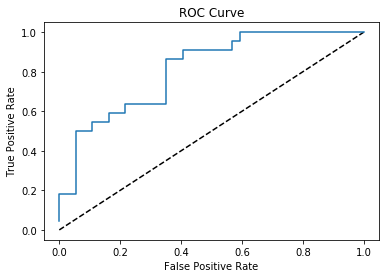

In [66]:
# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [67]:
roc_auc_score(y_test, y_pred_prob)

0.8095823095823096

In [68]:
confusion_matrix(y_test,y_pred)

array([[35,  2],
       [13,  9]], dtype=int64)

In [69]:
print(classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.73      0.95      0.82        37
          1       0.82      0.41      0.55        22

avg / total       0.76      0.75      0.72        59



In [58]:
cv_scores = cross_val_score(pipeline, X, y, cv=10)

C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Users\giova\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:564: ConvergenceWarning: Stochastic Optimizer: Maximum

In [59]:
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))


[0.76666667 0.63333333 0.56666667 0.8        0.63333333 0.6
 0.75862069 0.78571429 0.71428571 0.78571429]
Average 5-Fold CV Score: 0.7044334975369458
